In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

# 1

In [6]:
df=pd.read_csv("kc_house_data.csv", sep=",")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
del df["waterfront"]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:xlabel='view', ylabel='Count'>

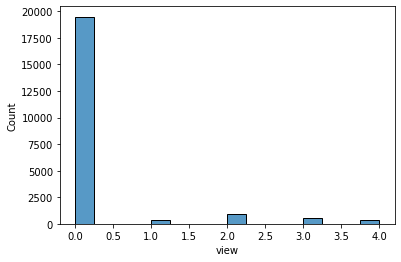

In [16]:
import seaborn as sns
sns.histplot(data=df, x="view")

In [17]:
df.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

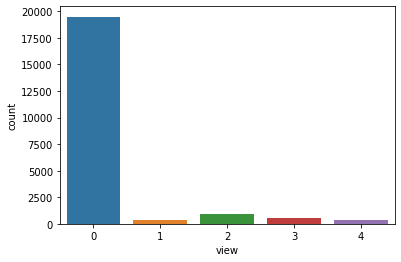

In [18]:
CP = sns.countplot(x="view", data=df)

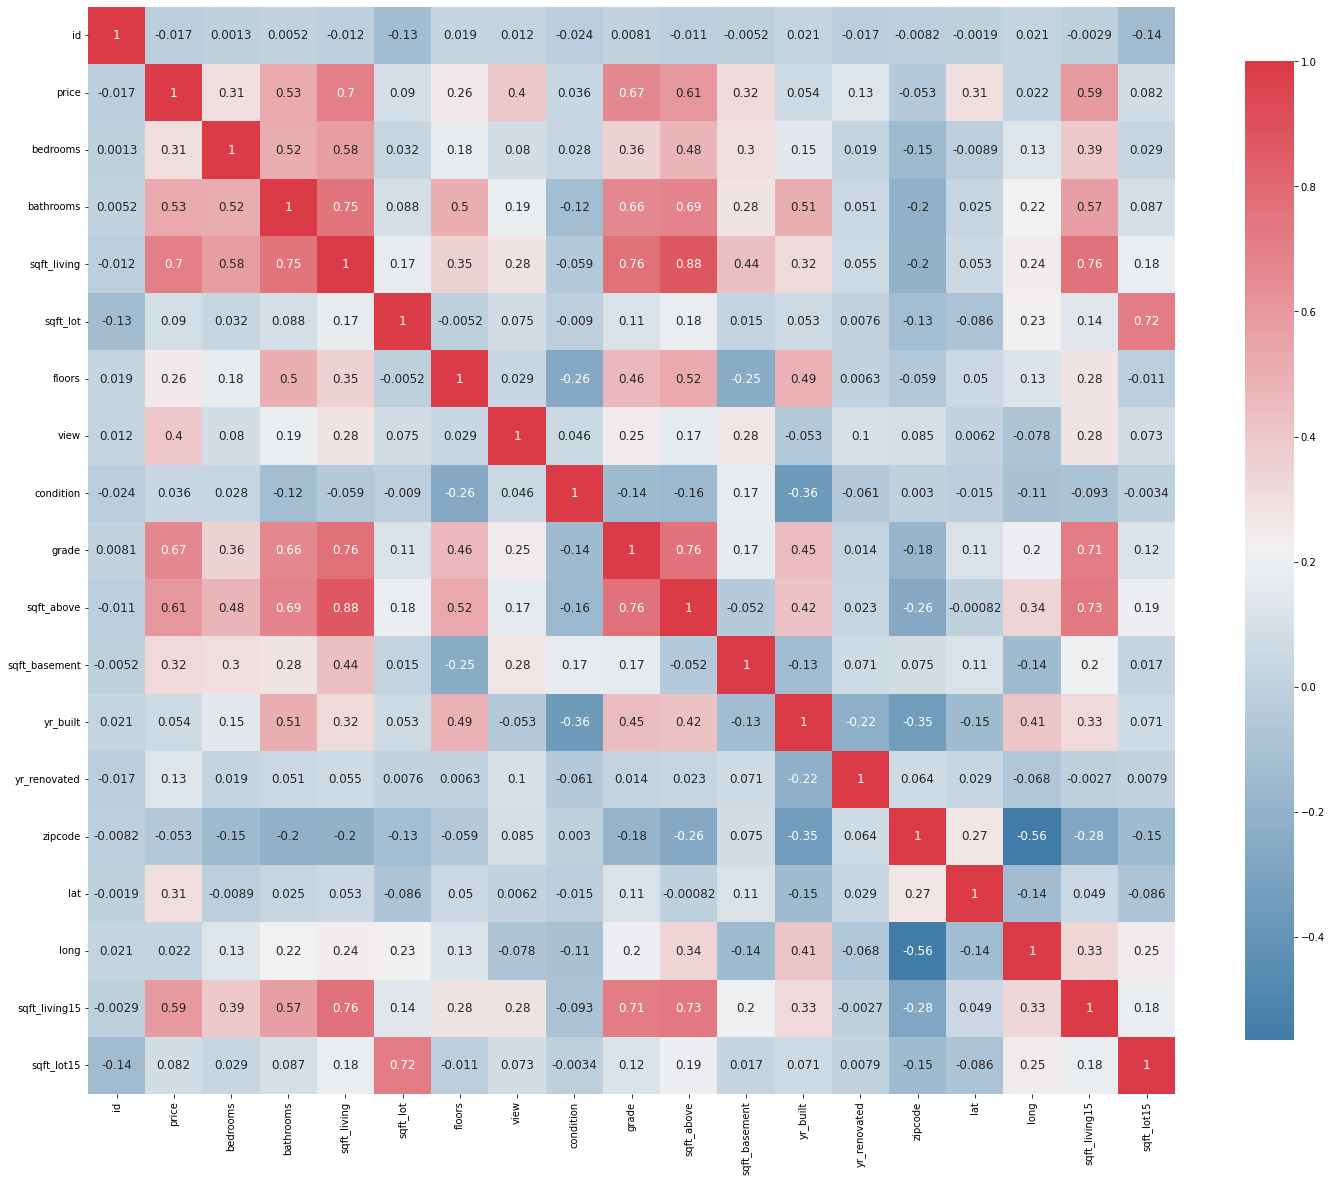

In [30]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 25 , 20 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

plot_correlation_map(df)

# 3. Split dataset

In [68]:
y=df["price"]
X=np.array(df["sqft_living"]).reshape(-1,1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=30)

In [69]:
model=LinearRegression()   #build linear regression model
model.fit(X_train,y_train)  #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 64179676631.68388
R squared 0.4879814110728805


# 6. Multiple-Linear Regression

In [77]:
from math import sqrt
y=df["price"]
X=np.array(df[["sqft_living","grade","sqft_above"]])
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=30)
model=LinearRegression()   #build linear regression model
model.fit(X_train,y_train)  #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
print("RMSE = ",sqrt(mean_squared_error(y_test,predicted)))

MSE 56970515284.14178
R squared 0.545495328472305
RMSE =  238684.97079653293


## Comparaison

Multiple-Linear Regression is more precise than the linear regression with only 1  feature

# 4. Linear Regression

ValueError: x and y must be the same size

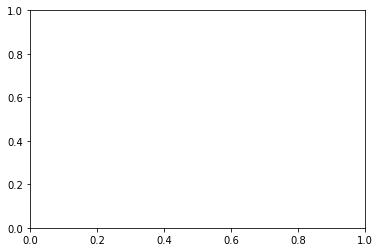

In [84]:
plt.scatter(X, y, color="r")
plt.title("Linear Regression")
plt.xlabel("SQFT living")
plt.ylabel("Price")
plt.plot(X, model.predict(X), color="b")
plt.show()

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

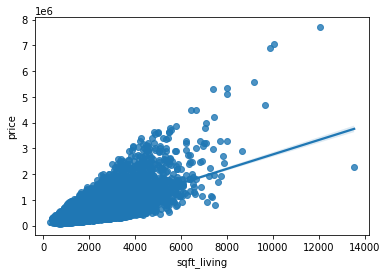

In [79]:
sns.regplot(data=df,x='sqft_living',y='price')

# 5. Measure the performance of linear regression

In [86]:
from sklearn.metrics import mean_absolute_error
print("MSE= ", mean_squared_error(y_test,predicted))
print("R squared= ", metrics.r2_score(y_test,predicted))
print("RMSE= ",sqrt(mean_squared_error(y_test,predicted)))
print("MAE= ", mean_absolute_error(y_test, predicted))

MSE=  56970515284.14178
R squared=  0.545495328472305
RMSE=  238684.97079653293
MAE=  159510.79389478464


# 7. Polynomial Regression

In [88]:
lg= LinearRegression()
poly=PolynomialFeatures(degree=2)
X_train_fit=poly.fit_transform(X_train)
lg.fit(X_train_fit, y_train)
X_test_ = poly.fit_transform(X_test)
PREDICTED= lg.predict(X_test_)

print("MSE= ", mean_squared_error(y_test,PREDICTED))
print("R squared= ", metrics.r2_score(y_test,PREDICTED))
print("RMSE= ",sqrt(mean_squared_error(y_test,PREDICTED)))
print("MAE= ", mean_absolute_error(y_test, PREDICTED))

MSE=  48364073871.59944
R squared=  0.6141565966339211
RMSE=  219918.3345508042
MAE=  144576.19443757666


##### D'apres les resultats des mesures des performances de la regression lineaire, on remarque bien que la regression polynominale est encore plus precise que la regression multiple. le R² s'est un peu plus rapproché de 1 et la valeurs des autres a diminuée par rapport a la regression multiple et surtout par rapport a la regression lineaire.